In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
import random
import os

In [2]:
twitch_game = "../Data/Twitch_game_data.csv"
twitch_global = "../Data/Twitch_global_data.csv"
sales = "../Data/Video_Games_sales.csv"

clean_og = "../Cleaned_Data/Clearned_Original_Data"
clean_merged_sale_twitch = "../Cleaned_Data/Cleaned_Merged_Sale&Twitch Data"

df = pd.read_csv(clean_merged_sale_twitch)

In [3]:
df.head()

,Unnamed: 0,Rank,Name,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Platform,Genre,NA_Sales,Global_Sales
0,5,6,Minecraft,1,2016,10231056,490002 hours,64432,1538,88820,13769,659,20.88,X360,Misc,5.70,9.18
1,6,6,Minecraft,1,2016,10231056,490002 hours,64432,1538,88820,13769,659,20.88,PS3,Misc,2.03,5.26
2,7,6,Minecraft,1,2016,10231056,490002 hours,64432,1538,88820,13769,659,20.88,PS4,Misc,1.48,4.32
3,8,6,Minecraft,1,2016,10231056,490002 hours,64432,1538,88820,13769,659,20.88,XOne,Misc,1.61,2.76
4,9,6,Minecraft,1,2016,10231056,490002 hours,64432,1538,88820,13769,659,20.88,PSV,Misc,0.18,1.96


In [4]:
print(f"The number of unique games in this data set: {df['Name'].nunique()}")

The number of unique games in this data set: 386


In [5]:
grouped_games = df.groupby(df["Name"])
mean_grouped_games = grouped_games.mean()
mean_grouped_games.head()

,Unnamed: 0,Rank,Month,Year,Hours_watched,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,NA_Sales,Global_Sales
Name,,,,,,,,,,,,,
7 Days to Die,9687.075758,107.515152,6.227273,2018.272727,809400.227273,11135.909091,214.621212,6993.287879,1105.696970,98.409091,11.291970,0.035,0.095
APB Reloaded,514.000000,99.000000,2.000000,2016.000000,277614.000000,17386.000000,37.000000,1073.000000,399.000000,15.000000,25.830000,0.020,0.040
Alien: Isolation,8247.555556,160.944444,6.944444,2017.777778,387170.777778,14817.055556,110.000000,3984.666667,527.222222,24.777778,23.716667,0.166,0.478
Animal Crossing: New Leaf,3611.000000,190.000000,11.000000,2016.000000,117314.000000,13805.000000,16.000000,160.000000,163.000000,1.000000,83.860000,2.030,9.160
Ape Escape,4138.000000,169.500000,7.000000,2016.500000,233091.000000,150698.000000,9.500000,59.000000,313.000000,0.000000,827.515000,0.355,0.835


In [6]:
max_grouped_games = grouped_games.max()
max_grouped_games.head()

,Unnamed: 0,Rank,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio,Platform,Genre,NA_Sales,Global_Sales
Name,,,,,,,,,,,,,,,,
7 Days to Die,18224,192,12,2021,2392372,98259 hours,44237,950,27860,3219,256,24.43,XOne,Action,0.04,0.14
APB Reloaded,514,99,2,2016,277614,10747 hours,17386,37,1073,399,15,25.83,PC,Role-Playing,0.02,0.04
Alien: Isolation,16552,199,12,2020,1291612,9398 hours,73694,408,11440,1738,83,57.29,XOne,Shooter,0.34,1.13
Animal Crossing: New Leaf,3611,190,11,2016,117314,1399 hours,13805,16,160,163,1,83.86,3DS,Simulation,2.03,9.16
Ape Escape,6011,188,7,2017,299969,556 hours,163153,11,72,403,0,1115.52,PS3,Platform,0.71,1.63


In [7]:
# Top 20 viewed games on Twitch by peak viewership
peak_viewers_by_game = max_grouped_games.sort_values(by = ["Peak_viewers"], ascending=False)
top_twenty_peak_view = peak_viewers_by_game.head(20)


The most viewed game by peak viewers in this data set is: Grand Theft Auto V


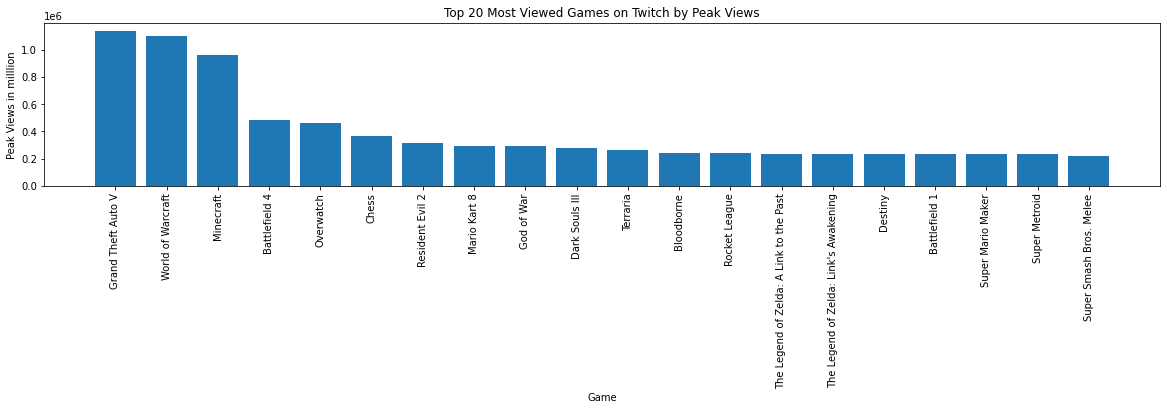

In [8]:
# Most viewed game by peak viewership
peak_viewers = grouped_games["Peak_viewers"].max()
most_viewed_game = df.loc[df["Peak_viewers"] == peak_viewers.max()]

x = np.arange(len(top_twenty_peak_view))
peak_viewers_value_count = grouped_games["Peak_viewers"].value_counts()

print(f"The most viewed game by peak viewers in this data set is: {most_viewed_game.iloc[0, 2]}")

plt.figure(figsize=(20,3))
plt.bar(x, top_twenty_peak_view["Peak_viewers"])

tick_locations = [value for value in x]
plt.xticks(tick_locations, top_twenty_peak_view.index, rotation = "vertical")

plt.title("Top 20 Most Viewed Games on Twitch by Peak Views")
plt.xlabel("Game")
plt.ylabel("Peak Views in milllion")

# plt.tight_layout()
plt.savefig("output_figures/top_20_peak_views.png")
plt.show() 

The most viewed game by average viewers in this data set is: Grand Theft Auto V


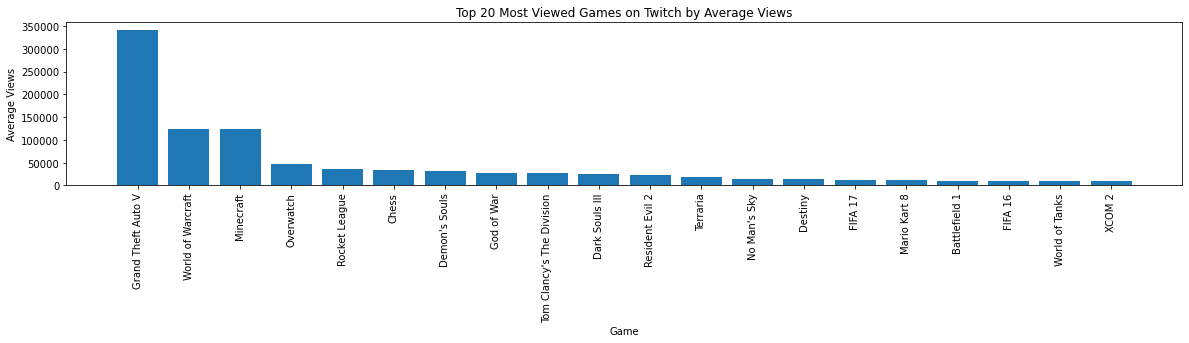

In [9]:
# Top 20 viewed games on Twitch by average viewership
mean_viewers_by_game = max_grouped_games.sort_values(by = ["Avg_viewers"], ascending=False)
top_twenty_mean_view = mean_viewers_by_game.head(20)

# Most viewed game by average viewership
mean_viewers = grouped_games["Avg_viewers"].max()
most_viewed_game = df.loc[df["Avg_viewers"] == mean_viewers.max()]

x = np.arange(len(top_twenty_mean_view))
mean_viewers_value_count = grouped_games["Avg_viewers"].value_counts()

print(f"The most viewed game by average viewers in this data set is: {most_viewed_game.iloc[0, 2]}")

plt.figure(figsize=(20,3))
plt.bar(x, top_twenty_mean_view["Avg_viewers"])

tick_locations = [value for value in x]
plt.xticks(tick_locations, top_twenty_mean_view.index, rotation = "vertical")

plt.title("Top 20 Most Viewed Games on Twitch by Average Views")
plt.xlabel("Game")
plt.ylabel("Average Views")

# plt.tight_layout()
plt.savefig("output_figures/top_20_mean_views.png")
plt.show() 